<a href="https://colab.research.google.com/github/jaeohshin/introduction_to_ml_with_python/blob/main/01_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classifying Iris Species using scikit-learn library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import scipy as sp
import sklearn

ModuleNotFoundError: ignored

In [ ]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", matplotlib.__version__)
print("scipy version:", sp.__version__)
print("scikit-learn version:", sklearn.__version__)

numpy version: 1.23.5
pandas version: 1.5.3
matplotlib version: 3.7.1
scipy version: 1.11.2
scikit-learn version: 1.2.2


In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris_dataset['DESCR'][:193] + "\n")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre



In [ ]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("Target names:", iris_dataset['feature_names'])

Target names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("Target names:", type(iris_dataset['data']))

Target names: <class 'numpy.ndarray'>


In [ ]:
print("Target names:", iris_dataset['data'].shape)

Target names: (150, 4)


In [ ]:
print("Target names:\n", iris_dataset['data'][:5])

Target names:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print("Target names:\n", iris_dataset['target'][:300])

Target names:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.25, random_state = 0)

# From the data (length, width of Petal and Sepal) to the species of iris

In [ ]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


# Visualization of the data

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

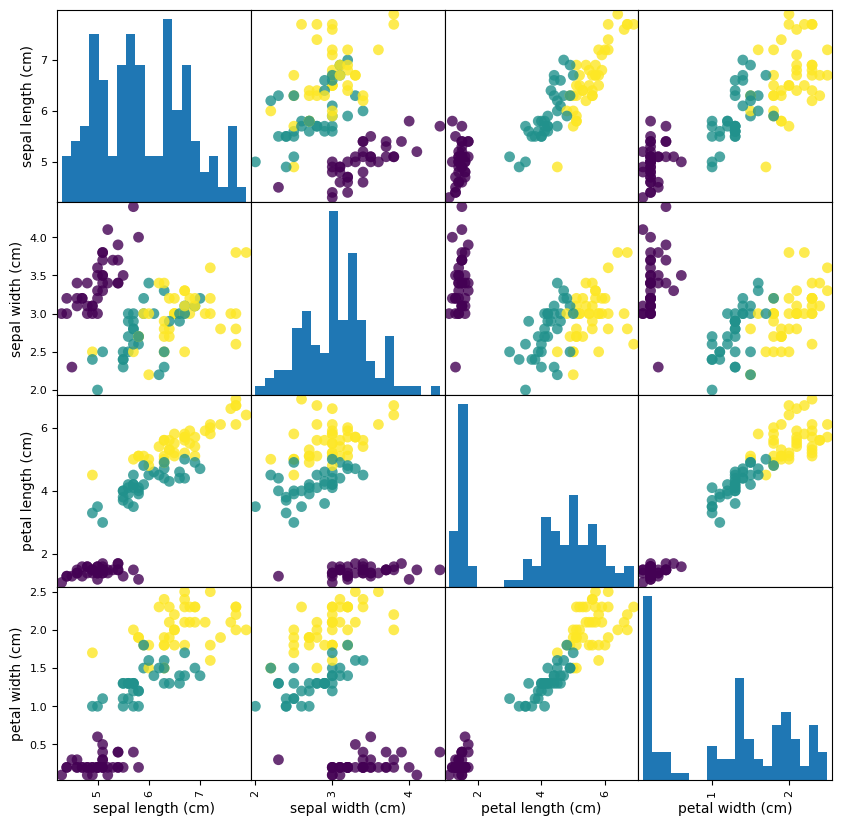

In [ ]:
# Create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (10, 10), marker='o', hist_kwds = {'bins' : 20}, s=60, alpha=0.8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: ", X_new.shape)

X_new.shape:  (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name: ", iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name:  ['setosa']


In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions: \n", y_pred)

Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
